In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.datasets import imdb
import pandas as pd 
import numpy as np
import re
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

Using TensorFlow backend.


# Importing Data

In [3]:
json_df = pd.read_csv('json_df_cleaned_train_val_1.csv')
json_df_test=pd.read_csv('json_df_cleaned_test_1.csv')

In [4]:
df_i=json_df_test.copy()

In [5]:
df_i.head()

,Stock,Date_T,Month,Day,WeekDay,WeekNumber,Tidy_Tweet,Punctuation_%,Text Length
0,CELG,2018-10-25,10,25,3,43,noth exit,3.7,27
1,AMD,2018-07-13,7,13,4,28,yall exhaust buyer first green candl byee,9.3,54
2,AMD,2018-09-25,9,25,1,39,day trader day,11.1,18
3,MU,2018-07-31,7,31,1,31,weak price action far today dont afraid go sho...,3.4,88
4,AMZN,2018-08-04,8,4,5,31,continu grow specif key area like cloud comput...,3.7,108


In [6]:
reviews = np.array(json_df['Tidy_Tweet'])
sentiments = np.array(json_df['Sentiment_score'])
reviews_test= np.array(json_df_test['Tidy_Tweet'])

In [7]:
from sklearn.model_selection import train_test_split
X_train_sent,X_val_sent,y_train_sent,y_val_sent=train_test_split(reviews,sentiments,test_size=0.3,random_state=42)

In [8]:
sentiments_train = np.array(y_train_sent)
sentiments_val = np.array(y_val_sent)

In [9]:
y_train = to_categorical(sentiments_train)
y_val = to_categorical(sentiments_val)

In [10]:
encoded_sentiment_train = np.array(pd.get_dummies(sentiments_train))
encoded_sentiment_val = np.array(pd.get_dummies(sentiments_val))

In [11]:
tokenizer = Tokenizer(num_words=10000, split=' ', oov_token=False)
tokenizer.fit_on_texts(X_train_sent)
tokenizer.word_index

{False: 1,
 'not': 2,
 'buy': 3,
 'short': 4,
 'report': 5,
 'go': 6,
 'q': 7,
 'call': 8,
 'today': 9,
 'trade': 10,
 'stock': 11,
 'day': 12,
 'get': 13,
 'estim': 14,
 'earn': 15,
 'like': 16,
 'sell': 17,
 'share': 18,
 'expect': 19,
 'look': 20,
 'volum': 21,
 'market': 22,
 'see': 23,
 'back': 24,
 'good': 25,
 'week': 26,
 'analyst': 27,
 'time': 28,
 'next': 29,
 'price': 30,
 'put': 31,
 'come': 32,
 'hold': 33,
 'tomorrow': 34,
 'no': 35,
 'new': 36,
 'bear': 37,
 'ep': 38,
 'long': 39,
 'close': 40,
 'face': 41,
 'still': 42,
 'revenu': 43,
 'move': 44,
 'lol': 45,
 'last': 46,
 'year': 47,
 'think': 48,
 'growth': 49,
 'bull': 50,
 'let': 51,
 'er': 52,
 'big': 53,
 'money': 54,
 'higher': 55,
 'one': 56,
 'high': 57,
 'bmo': 58,
 'amc': 59,
 'open': 60,
 'alert': 61,
 'make': 62,
 'sinc': 63,
 'posit': 64,
 'would': 65,
 'drop': 66,
 'updat': 67,
 'take': 68,
 'need': 69,
 'amd': 70,
 'believ': 71,
 'sale': 72,
 'rate': 73,
 'insid': 74,
 'low': 75,
 'break': 76,
 'compani

In [12]:
X_train_tok = tokenizer.texts_to_sequences(X_train_sent)
X_val_tok = tokenizer.texts_to_sequences(X_val_sent)
X_test_tok = tokenizer.texts_to_sequences(reviews_test)

In [13]:
max_length_train = max([len(i) for i in X_train_tok])
max_length_val = max([len(i) for i in X_val_tok])
max_length_test = max([len(i) for i in X_test_tok])

In [14]:
max_length = max(max_length_train, max_length_val, max_length_test)
print("The maximum length of a tweet is - ", max_length)

The maximum length of a tweet is -  226


In [15]:
X_train_sent = pad_sequences(X_train_tok, maxlen=max_length, padding='post')
X_val_sent = pad_sequences(X_val_tok, maxlen=max_length, padding='post')
X_test_sent = pad_sequences(X_test_tok, maxlen=max_length, padding='post')

In [16]:
print(X_train_sent.shape, X_val_sent.shape, X_test_sent.shape)

(690762, 226) (296041, 226) (254741, 226)


In [17]:
embed_dim = 128
lstm_out = 64
model = Sequential()
model.add(Embedding(10000, embed_dim, input_length = X_train_sent.shape[1]))
model.add(Dropout(0.2))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 226, 128)          1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 226, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 1,329,733
Trainable params: 1,329,733
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
batch_size = 100
history=model.fit(X_train_sent, encoded_sentiment_train, epochs = 2, batch_size=batch_size, verbose=1)

Epoch 1/2
690762/690762 [==============================] - 4585s 7ms/step - loss: 1.4488 - acc: 0.4313
Epoch 2/2
690762/690762 [==============================] - 3584s 5ms/step - loss: 1.4480 - acc: 0.4314


In [27]:
eval_history=model.evaluate(X_val_sent,encoded_sentiment_val)

296041/296041 [==============================] - 1428s 5ms/step


In [20]:
# from keras.models import load_model

model.save('lstm_embd_sentiment(bad).h5')  # creates a HDF5 file 
# del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# model = load_model('my_model.h5')

In [28]:
history.history

{'loss': [1.4487626590234528, 1.4480253203710887],
 'acc': [0.4313164283156191, 0.43136564930305243]}

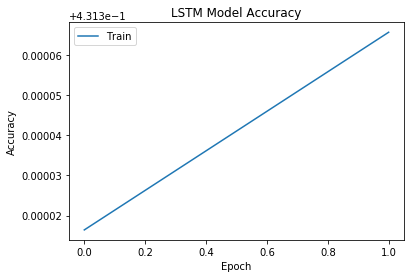

In [29]:
plt.plot(history.history['acc'])
# plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

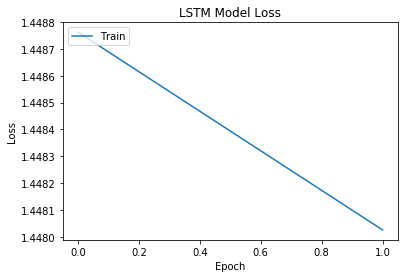

In [30]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc = 'upper left')
plt.show()

In [31]:
y_LSTM_train = model.predict(X_train_sent)
y_LSTM_val = model.predict(X_val_sent)
y_train_lstm = np.argmax(y_LSTM_train, axis=1)
y_pred_lstm = np.argmax(y_LSTM_val, axis=1)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_sent, y_train_lstm)

array([[     0,      0,  63288,      0,      0],
       [     0,      0,  82662,      0,      0],
       [     0,      0, 297971,      0,      0],
       [     0,      0, 140793,      0,      0],
       [     0,      0, 106048,      0,      0]], dtype=int64)

In [34]:
accuracy_score(y_train_sent, y_train_lstm)

NameError: name 'accuracy_score' is not defined

In [ ]:
classification_report(y_train_sent, y_train_lstm)

In [ ]:
confusion_matrix(y_val_sent, y_pred_lstm)

In [ ]:
accuracy_score(y_val_sent, y_pred_lstm)

In [ ]:
classification_report(y_val_sent, y_pred_lstm)

In [ ]:
y_LSTM_test = model.predict(X_test_sent)
y_test_lstm = np.argmax(y_LSTM_test, axis=1)

In [ ]:
lstm_s_pred = pd.DataFrame({ 'Stock': df_i['Stock'],'Date_T': df_i['Date_T'],'Sentiment_score_pred': y_test_lstm})

lstm_s_pred.head(10)

In [ ]:
# lstm_s_pred.shape

In [ ]:
# lstm_s_pred['Sentiment_score_pred'].value_counts()

# Simple Model values saved to CSV (LSTM)

In [ ]:
# lstm_s_pred.to_csv('Rf_senti_lstm_pred.csv', index=False)